## **Udemy Finance & Accounting Courses – Subscriber and Rating Prediction**

### **Project Overview**
- This project focuses on analyzing and predicting learner engagement for Finance & Accounting courses available on Udemy.

Using structured course metadata, the goal is to build predictive models that estimate:
- The number of subscribers a course receives


The project emphasizes strong data cleaning, feature engineering, and leakage-free modeling practices, following real-world data science standards.

Machine learning dataset is created to ensure logical correctness and prevent target leakage:
- **Subscriber Prediction Dataset**

### **Data Source**

The dataset consists of Finance & Accounting courses scraped from Udemy and contains approximately 13,600 courses. Each row represents a unique course and includes information such as pricing, publication timing, course structure, and learner engagement metrics.

### **Key Objective**
- Predict the number of subscribers using course attributes available at or before publication




## **Data Cleaning and Feature Engineering (Excel)**

Initial data cleaning and feature engineering were performed in Microsoft Excel to ensure a strong understanding of the raw data before modeling.

Key steps included:

- Conversion of date fields into meaningful time-based features such as:
  - Published year and month
  - Course age (in days)
  - Time taken to publish a course after creation

- Resolution of pricing inconsistencies:
  - Corrected cases where courses were marked as paid despite having zero price
  - Derived a clean `is_paid` flag based on price availability
  - Avoided unreliable discount percentage calculations due to inconsistent price scaling

- Binary encoding of categorical fields such as:
  - Paid vs free courses
  - Discount availability
  - Wishlist status

- Creation of modeling dataset to prevent target leakage:
  - Subscriber prediction dataset (log-transformed target)

The cleaned dataset was exported as CSV file and used for Python-based analysis and modeling.


In [ ]:
# Import core libraries for data analysis and numerical computation
import pandas as pd
import numpy as np

# Import visualization library
import matplotlib.pyplot as plt

# Load the subscriber prediction dataset
subscriber_df = pd.read_csv("log_num_subscribers dataset.csv")

# Display the first few rows
subscriber_df.head()


,is_paid,is_discounted,original_price,is_wishlisted,num_published_lectures,num_published_practice_tests,creation_to_publish_days,published_year,published_month,course_age_days,log_num_subscribers
0,1,1,8640,0,84,0,52,2016,4,3568,12.596458
1,1,1,8640,0,78,0,1,2016,8,3429,12.250429
2,1,1,8640,0,292,2,49,2017,11,2981,11.953005
3,1,1,8640,0,338,0,90,2016,1,3644,12.412522
4,1,1,8640,0,83,0,91,2016,1,3654,12.834247


### **Python Environment Setup and Data Import**

In this step, the Python environment is prepared and the cleaned subscriber prediction dataset is loaded for analysis.

The following libraries are imported:
- **pandas**: Used for loading and manipulating structured tabular data.
- **numpy**: Provides numerical computation support.
- **matplotlib**: Used for data visualization during exploratory data analysis.

After setting up the environment, the subscriber prediction dataset is loaded from a CSV file that was generated after extensive data cleaning and feature engineering in Excel. This dataset contains only numeric, modeling-ready features along with a log-transformed target variable representing the number of subscribers.

The first few rows of the dataset are displayed to verify:
- Successful file loading
- Correct column names
- Reasonable and expected data values

This step confirms that the dataset is ready for further inspection and exploratory data analysis.


In [ ]:
# Check the shape of the dataset
print("Dataset Shape:")
print(subscriber_df.shape)

# Inspect column data types
print("\nColumn Data Types:")
print(subscriber_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(subscriber_df.isna().sum())


Dataset Shape:
(13608, 11)

Column Data Types:
is_paid                           int64
is_discounted                     int64
original_price                    int64
is_wishlisted                     int64
num_published_lectures            int64
num_published_practice_tests      int64
creation_to_publish_days          int64
published_year                    int64
published_month                   int64
course_age_days                   int64
log_num_subscribers             float64
dtype: object

Missing Values:
is_paid                         0
is_discounted                   0
original_price                  0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
creation_to_publish_days        0
published_year                  0
published_month                 0
course_age_days                 0
log_num_subscribers             0
dtype: int64


## **Initial Data Inspection**

An initial inspection was performed to validate the structure and quality of the subscriber prediction dataset before exploratory analysis and modeling.

The dataset contains 13,608 observations and 11 columns, confirming that the data was imported correctly after Excel-based preprocessing.

All columns were inspected for data types and were found to be numeric. Binary indicators and count-based features are stored as integers, while the log-transformed target variable is stored as a floating-point value. This confirms that the dataset is suitable for machine learning models without additional encoding.

Finally, missing values were checked across all columns. No missing values were found, indicating that no further data cleaning or imputation is required.

Overall, the dataset is clean, fully numeric, and ready for exploratory data analysis and model development.


In [ ]:
# Descriptive statistics for the target variable
subscriber_df["log_num_subscribers"].describe()


,log_num_subscribers
count,13608.000000
mean,5.926738
std,2.389848
min,0.000000
25%,4.143135
50%,6.280396
75%,7.732150
max,12.834247


### **Descriptive Statistics – Target Variable**

The first step in exploratory data analysis focuses on understanding the distribution and statistical properties of the target variable, `log_num_subscribers`.

The target represents the natural logarithm of the number of subscribers for each course. A log transformation was applied during preprocessing to address the strong right skew typically observed in subscriber counts.

Descriptive statistics are examined to understand:
- The central tendency (mean and median)
- The spread of values
- The minimum and maximum range
- The presence of zero-subscriber courses

This analysis helps confirm whether the transformed target variable is well-behaved and suitable for regression modeling.


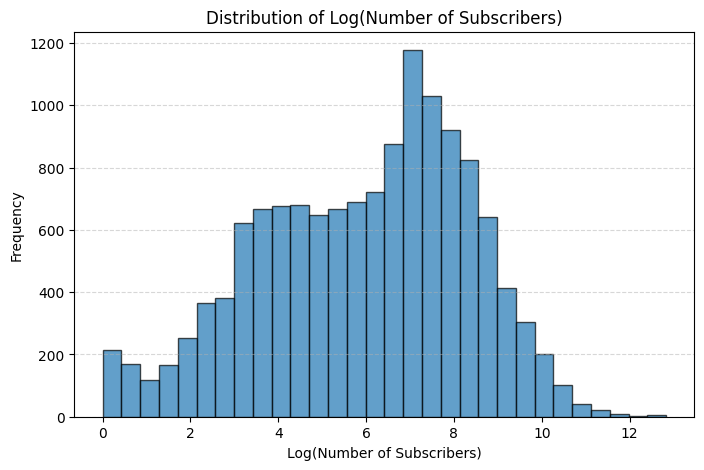

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))

plt.hist(
    subscriber_df["log_num_subscribers"],
    bins=30,
    edgecolor="black",
    alpha=0.7
)


plt.xlabel("Log(Number of Subscribers)")
plt.ylabel("Frequency")
plt.title("Distribution of Log(Number of Subscribers)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()



### **Target Variable Distribution(Histogram)**

A histogram is used to visualize the distribution of the log-transformed subscriber count.

The distribution appears approximately bell-shaped, indicating that the log transformation successfully reduced skewness present in the original subscriber counts. A small concentration near zero represents courses with very few or no subscribers, which is expected behavior in online learning platforms.

The absence of extreme skew or outliers suggests that the target variable is well-suited for regression-based modeling approaches without requiring further transformation.


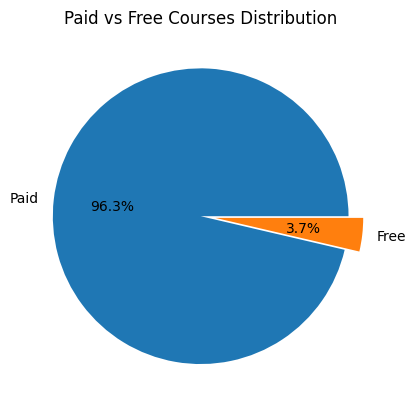

In [ ]:
# Paid vs Free Courses Distribution

# Defining labels for clarity
subscriber_df["paid_label"] = subscriber_df["is_paid"].map({1: "Paid", 0: "Free"})

# Count values
paid_counts = subscriber_df["paid_label"].value_counts()

# Plot improved pie chart
plt.figure()
plt.pie(
    paid_counts,
    labels=paid_counts.index,
    autopct="%1.1f%%",
    explode=[0, 0.1]
)
plt.title("Paid vs Free Courses Distribution")
plt.show()


### **Paid vs Free Courses Distribution**

This pie chart visualizes the distribution of paid and free courses in the Finance & Accounting category.

Binary values from the `is_paid` feature were mapped to descriptive labels to improve interpretability. The visualization shows that an overwhelming majority of courses are paid, while only a small fraction are offered for free.

A slight separation was applied to the smaller slice to enhance visibility and emphasize the imbalance between paid and free courses. This distribution provides important context for understanding enrollment behavior and pricing strategies on the platform.


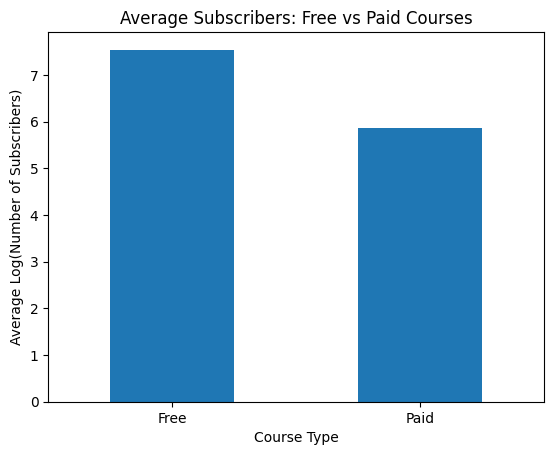

In [ ]:
# Average Subscribers: Paid vs Free Courses

subscriber_df["paid_label"] = subscriber_df["is_paid"].map({1: "Paid", 0: "Free"})
avg_subs_paid = subscriber_df.groupby("paid_label")["log_num_subscribers"].mean()

# Plot bar chart
plt.figure()
avg_subs_paid.plot(kind="bar")
plt.xlabel("Course Type")
plt.ylabel("Average Log(Number of Subscribers)")
plt.title("Average Subscribers: Free vs Paid Courses")
plt.xticks(rotation=0)

plt.show()



### **Average Subscribers: Paid vs Free Courses**

This bar chart compares the average number of subscribers between paid and free courses using the log-transformed subscriber count.

Grouping by the `is_paid` feature helps assess whether paid courses tend to attract more subscribers than free courses on average. The use of the log scale ensures that extreme values do not dominate the comparison.

This analysis provides insight into how pricing strategy relates to course popularity and helps validate whether paid status is a meaningful predictor for subscriber count.

On average, free courses attract more subscribers than paid courses.

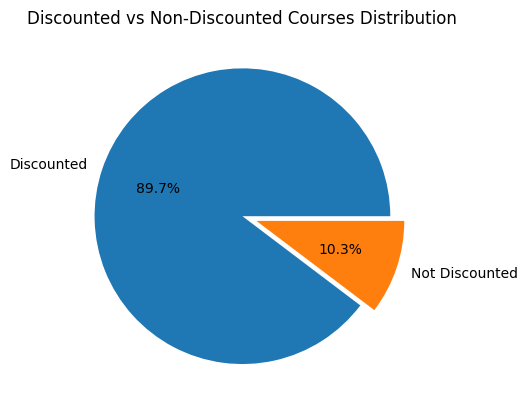

In [ ]:
# Discounted vs non-discounted courses distribution
subscriber_df["discount_label"] = subscriber_df["is_discounted"].map({1: "Discounted", 0: "Not Discounted"})

# Count values
discount_counts = subscriber_df["discount_label"].value_counts()

# Plot pie chart
plt.figure()
plt.pie(
    discount_counts,
    labels=discount_counts.index,
    autopct="%1.1f%%",
    explode=[0, 0.1]
)
plt.title("Discounted vs Non-Discounted Courses Distribution")
plt.show()



### **Discounted vs Non-Discounted Courses Distribution**

This pie chart illustrates the proportion of courses offered with discounts versus those without discounts.

The binary `is_discounted` variable was mapped to descriptive labels to improve interpretability. The visualization shows that a large majority of courses are offered at discounted prices, which aligns with Udemy’s frequent promotional pricing strategy.

Highlighting this distribution provides important context for understanding enrollment behavior and supports the inclusion of discount-related features in subscriber prediction models.


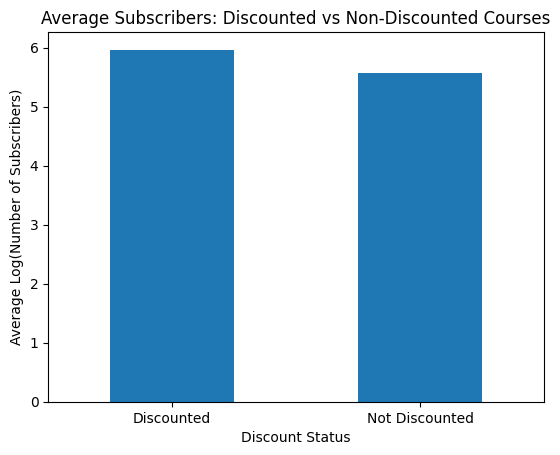

In [ ]:
# Calculating average log subscribers by discount status
subscriber_df["discount_label"] = subscriber_df["is_discounted"].map({1: "Discounted", 0: "Not Discounted"})
avg_subs_discount = subscriber_df.groupby("discount_label")["log_num_subscribers"].mean()

# Plot bar chart
plt.figure()
avg_subs_discount.plot(kind="bar")
plt.xlabel("Discount Status")
plt.ylabel("Average Log(Number of Subscribers)")
plt.title("Average Subscribers: Discounted vs Non-Discounted Courses")
plt.xticks(rotation=0)

plt.show()



### **Average Subscribers: Discounted vs Non-Discounted Courses**

This bar chart compares the average subscriber count between discounted and non-discounted courses using the log-transformed subscriber metric.

The `is_discounted` binary feature was mapped to descriptive labels to improve readability. Grouping by discount status allows for a clear comparison of how promotional pricing relates to enrollment volume.

The results show that discounted courses tend to have a higher average number of subscribers. While this suggests that discounts positively influence enrollment, the relatively small difference indicates that discounting alone does not determine course success. Other factors such as course quality, age, and content depth are also likely to influence subscriber behavior.

This analysis supports the inclusion of discount-related features in the subscriber prediction model.


In [ ]:
# Correlation of features with the target variable

# Select only numeric columns
numeric_df = subscriber_df.select_dtypes(include=["int64", "float64"])

# Compute correlation with target
correlation_with_target = (
    numeric_df.corr()["log_num_subscribers"]
    .sort_values(ascending=False)
)

correlation_with_target


,log_num_subscribers
log_num_subscribers,1.000000
course_age_days,0.347950
num_published_lectures,0.218058
original_price,0.171136
is_discounted,0.049863
published_month,0.012648
creation_to_publish_days,-0.020557
num_published_practice_tests,-0.096868
is_paid,-0.131416
published_year,-0.344522


### **Correlation Analysis with Target Variable**

This section evaluates the linear relationship between numerical features and the target variable, `log_num_subscribers`, using Pearson correlation.

Only numeric columns were included in the analysis to ensure statistical validity. The results show that course age and content volume have the strongest positive correlations with subscriber count, indicating that older courses and courses with more lectures tend to accumulate more subscribers over time.

Pricing-related features exhibit weaker correlations, suggesting that while price and discounting may influence enrollment, they are not primary drivers on their own. The negative correlation with `published_year` further reinforces the importance of course longevity.

The feature `is_wishlisted` returned a NaN correlation due to lack of variance, indicating that it does not provide useful predictive information and can be excluded from modeling.


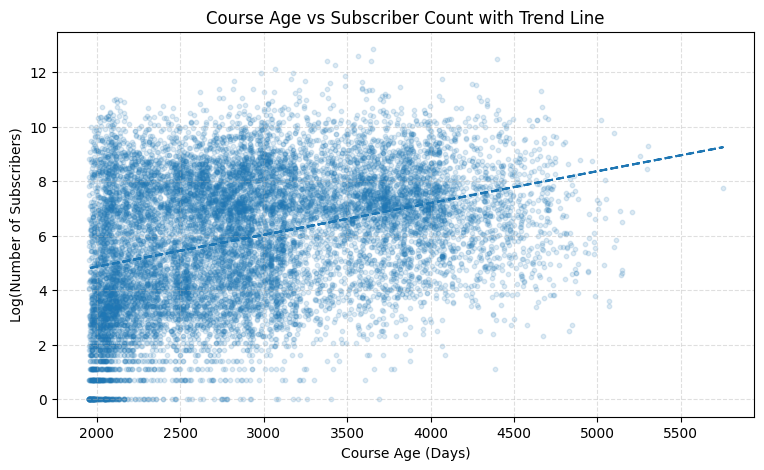

In [ ]:
# Relationship between course age and subscriber count
import numpy as np

z = np.polyfit(
    subscriber_df["course_age_days"],
    subscriber_df["log_num_subscribers"],
    1
)
p = np.poly1d(z)

plt.figure(figsize=(9, 5))
plt.scatter(
    subscriber_df["course_age_days"],
    subscriber_df["log_num_subscribers"],
    alpha=0.15,
    s=10
)
plt.plot(
    subscriber_df["course_age_days"],
    p(subscriber_df["course_age_days"]),
    linestyle="--"
)
plt.xlabel("Course Age (Days)")
plt.ylabel("Log(Number of Subscribers)")
plt.title("Course Age vs Subscriber Count with Trend Line")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


### **Course Age vs Subscriber Count with Trend Line**

This visualization examines the relationship between course age and subscriber count using a scatter plot combined with a linear trend line.

The scatter plot shows substantial variability in subscriber counts across all course ages, highlighting that age alone does not determine course success. To support interpretation, a trend line is included to summarize the overall direction of the relationship.

The positive slope of the trend line indicates that older courses tend to accumulate more subscribers over time, which aligns with the cumulative nature of enrollments. However, the wide dispersion of data points reinforces the need for multivariate modeling to account for additional factors such as pricing, content volume, and course reputation.


## Transition to Modeling

After completing exploratory data analysis, key patterns and relationships within the dataset have been identified. The analysis highlighted the importance of temporal features such as course age, content-related features like number of lectures, and pricing-related attributes.

With a clear understanding of feature behavior and data quality, the next step is to move from exploration to prediction. The dataset is now prepared for model development, beginning with a train–test split and baseline regression modeling.


In [ ]:
# Drop non-informative and label-based columns
subscriber_df_model = subscriber_df.drop(
    columns=["is_wishlisted", "paid_label", "discount_label"],
    errors="ignore"
)

# Check remaining columns
subscriber_df_model.columns


Index(['is_paid', 'is_discounted', 'original_price', 'num_published_lectures',
       'num_published_practice_tests', 'creation_to_publish_days',
       'published_year', 'published_month', 'course_age_days',
       'log_num_subscribers'],
      dtype='object')

### **Final Feature Set for Modeling**

After removing non-informative and label-based columns, the dataset now contains only numeric and meaningful predictors suitable for machine learning models. The remaining features represent course pricing, content structure, publication timing, and course age.

This refined feature set ensures model stability, prevents redundancy, and avoids issues related to categorical string variables. With the target variable still retained, the dataset is now fully prepared for feature–target separation and train–test splitting.


In [ ]:
# Separate features and target variable
X = subscriber_df_model.drop(columns=["log_num_subscribers"])
y = subscriber_df_model["log_num_subscribers"]

# Verify dimensions
X.shape, y.shape



((13608, 9), (13608,))

### **Feature–Target Separation**

In this step, the cleaned modeling dataset is divided into input features (X) and the target variable (y). The target variable, `log_num_subscribers`, represents the logarithmic transformation of subscriber counts and is the value the model aims to predict.

Separating features from the target ensures that the learning algorithm is trained only on explanatory variables and prevents data leakage. This step prepares the dataset for proper train–test splitting and model training.


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Verify split sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((10886, 9), (2722, 9), (10886,), (2722,))

### **Train–Test Split**

The dataset was split into training and testing sets using an 80–20 ratio. The training set is used to fit the machine learning model, while the testing set is reserved for evaluating model performance on unseen data.

A fixed random state was applied to ensure reproducibility of results. This step is essential for assessing how well the model generalizes beyond the data it was trained on and for avoiding overly optimistic performance estimates.


In [ ]:
# Initialize the Linear Regression model

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Train the model on training data
linear_model.fit(X_train, y_train)


LinearRegression()

### **Baseline Linear Regression Model**

A Linear Regression model was selected as the baseline predictive model for this project. Linear Regression provides a simple yet interpretable framework for understanding how input features relate to the target variable.

The model was trained using the training dataset, allowing it to learn linear relationships between course features and the log-transformed number of subscribers. This baseline will serve as a reference point for evaluating the performance of more advanced models later in the project.


In [ ]:
# Generate predictions on the test set
y_pred = linear_model.predict(X_test)

# Preview first few predictions
y_pred[:5]


array([5.63379535, 5.62231694, 6.3976126 , 4.67164912, 7.07004673])

### **Generating Predictions**

After training, the Linear Regression model was used to generate predictions on the test dataset. These predictions represent the model’s estimated log number of subscribers for previously unseen courses.

Evaluating predictions on unseen data is essential to assess how well the model generalizes beyond the training dataset.


In [ ]:
#Calculating Baseline Model Performance

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


(0.22880126818271074, np.float64(2.0721447094047463))

### **Baseline Model Performance**

The Linear Regression baseline model achieved an R² score of approximately 0.23, indicating that it explains about 23% of the variance in the log-transformed subscriber count. This level of performance is expected for a simple linear model applied to a complex real-world problem.

The RMSE value of approximately 2.07 reflects the average prediction error on the log scale. While the model captures meaningful relationships between course features and subscriber count, the results suggest that additional non-linear patterns and external factors may influence course popularity.

These results establish a solid baseline against which more advanced models can be compared.


In [ ]:
# Create a dataframe of model coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": linear_model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
1,is_discounted,1.575479
3,num_published_lectures,0.008821
2,original_price,0.000155
5,creation_to_publish_days,-0.000440
8,course_age_days,-0.002760
4,num_published_practice_tests,-0.095013
7,published_month,-0.135023
6,published_year,-1.461869
0,is_paid,-4.358566


### **Linear Regression Coefficient Analysis**

This step examines the coefficients learned by the Linear Regression model to understand how each feature influences the predicted log number of subscribers.

Each coefficient represents the expected change in the target variable for a one-unit increase in the corresponding feature, holding all other features constant. Positive coefficients indicate features that increase predicted subscriber counts, while negative coefficients indicate features that decrease them.

Analyzing these coefficients provides interpretability to the model and helps identify which course characteristics most strongly influence popularity.


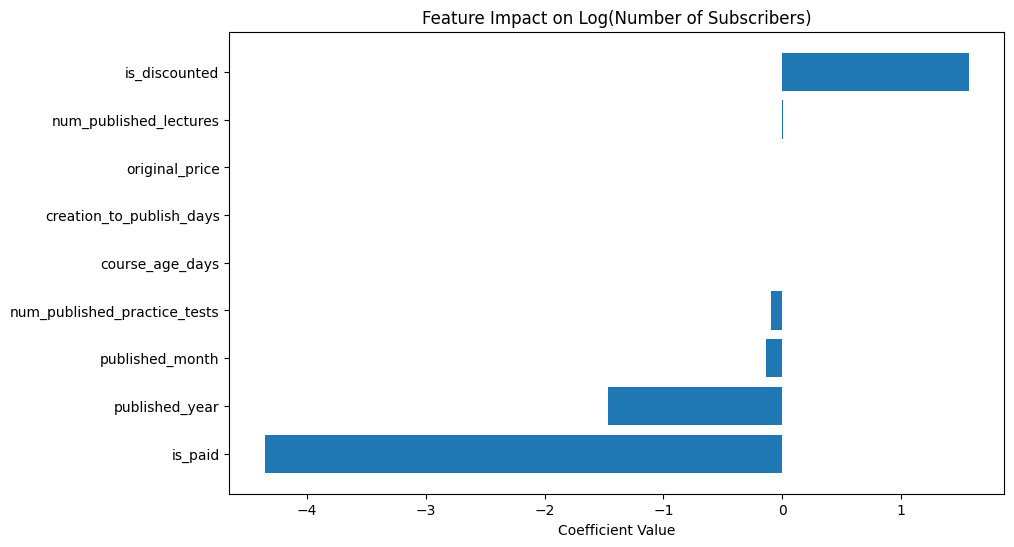

In [ ]:
# Visualization of Feature Coefficients

plt.figure(figsize=(10, 6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Feature Impact on Log(Number of Subscribers)")
plt.gca().invert_yaxis()
plt.show()


### **Visualization of Feature Coefficients**

This horizontal bar chart visualizes the coefficients of the Linear Regression model, allowing for easy comparison of feature influence on subscriber count.

Features with larger absolute coefficient values have a stronger impact on the model’s predictions. Positive bars indicate features that increase predicted subscriber counts, while negative bars indicate features associated with lower enrollment.

This visualization enhances interpretability and helps translate model results into actionable insights.


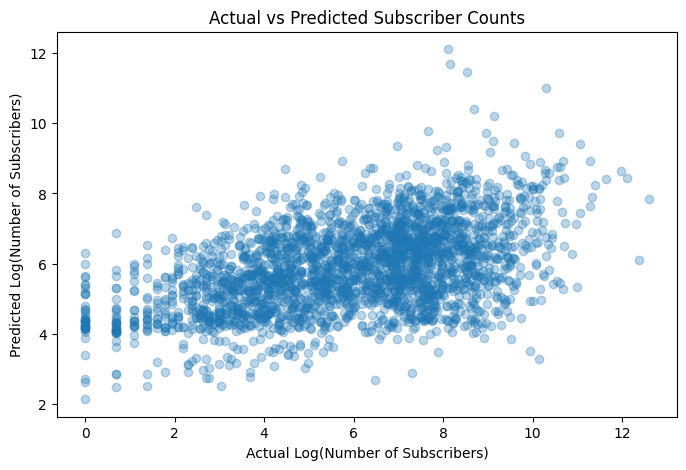

In [ ]:
# Actual vs Predicted Subscriber Count

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Log(Number of Subscribers)")
plt.ylabel("Predicted Log(Number of Subscribers)")
plt.title("Actual vs Predicted Subscriber Counts")
plt.show()


### **Actual vs Predicted Values**

This scatter plot compares the actual and predicted values of the log-transformed subscriber count on the test dataset.

Points closer to the diagonal represent more accurate predictions. The dispersion around the diagonal indicates the presence of prediction error and highlights areas where the model underperforms.

This visualization helps assess overall model fit and reveals whether the model systematically overestimates or underestimates subscriber counts.


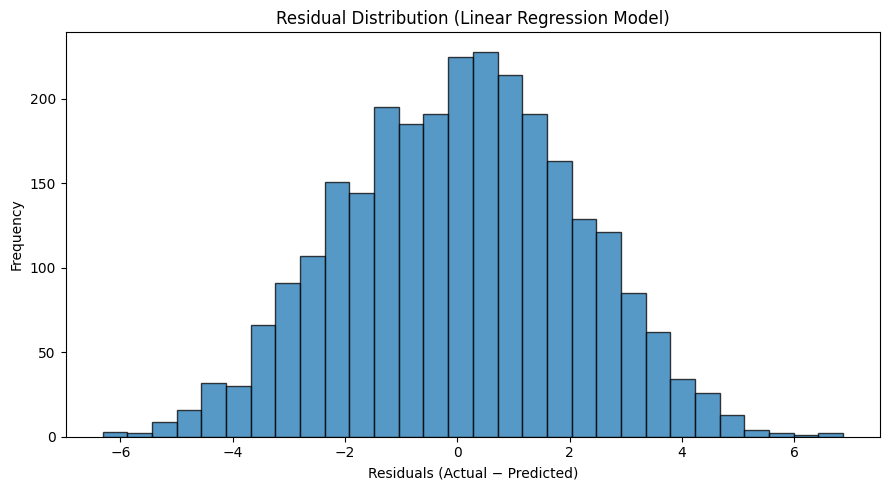

In [ ]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(9, 5))

plt.hist(
    residuals,
    bins=30,
    alpha=0.75,
    edgecolor="black"
)

# Zero reference line
plt.axvline(0, linestyle="", linewidth=2)

plt.title("Residual Distribution (Linear Regression Model)")
plt.xlabel("Residuals (Actual − Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### **Residual Distribution**

Residuals represent the difference between actual and predicted subscriber counts. Analyzing their distribution helps evaluate model assumptions and performance.

A roughly symmetric residual distribution centered around zero suggests that the model does not exhibit strong systematic bias. Deviations from this pattern indicate areas where the linear model may struggle to capture complex relationships.


In [ ]:
# Feature Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Verify shapes
X_train_scaled.shape, X_test_scaled.shape


((10886, 9), (2722, 9))

### **Feature Scaling using StandardScaler**

Before applying regularized linear models such as Ridge and Lasso Regression,
feature scaling is required to ensure that all input variables contribute
fairly to the model.

StandardScaler was used to standardize features by removing the mean and
scaling to unit variance. The scaler was fitted only on the training data
to prevent data leakage, and the same transformation was applied to the
test dataset.

This step ensures that the regularization penalty is applied consistently
across all features.


In [ ]:
# Ridge Regression with Hyperparameter Tuning

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Define alpha values
alpha_values = [0.01, 0.1, 1, 10, 100]

ridge_results = []

# Train and evaluate Ridge models
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)

    y_pred_ridge = ridge_model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred_ridge)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

    ridge_results.append((alpha, r2, rmse))

# Convert to DataFrame
ridge_results_df = pd.DataFrame(
    ridge_results,
    columns=["alpha", "r2_score", "rmse"]
)

ridge_results_df.sort_values(by="r2_score", ascending=False)


,alpha,r2_score,rmse
4,100.00,0.229759,2.070858
3,10.00,0.229490,2.071219
2,1.00,0.229232,2.071566
1,0.10,0.228895,2.072019
0,0.01,0.228812,2.072130


### **Ridge Regression with Regularization**

Ridge Regression was implemented as an extension of the baseline linear
regression model by introducing L2 regularization. This technique penalizes
large coefficient values, helping to reduce model variance and mitigate
multicollinearity among features.

Multiple values of the regularization strength parameter (alpha) were tested
to identify the best trade-off between bias and variance. Model performance
was evaluated using R² and RMSE on the test dataset.

This tuning process allows us to determine whether regularization improves
generalization compared to the baseline model.


In [ ]:
# Best Alpha Selection

best_alpha_ridge = ridge_results_df.sort_values(
    by="r2_score", ascending=False
).iloc[0]["alpha"]

# Train final Ridge model
ridge_best = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_best.fit(X_train_scaled, y_train)

best_alpha_ridge



np.float64(100.0)

### **Best Ridge Model Selection**
The performance metrics for different Ridge Regression models were compared
across multiple alpha values. The model achieving the highest R² score with
a relatively low RMSE was selected as the optimal Ridge configuration.

This comparison provides insight into whether regularization improves model
performance over the baseline linear regression.


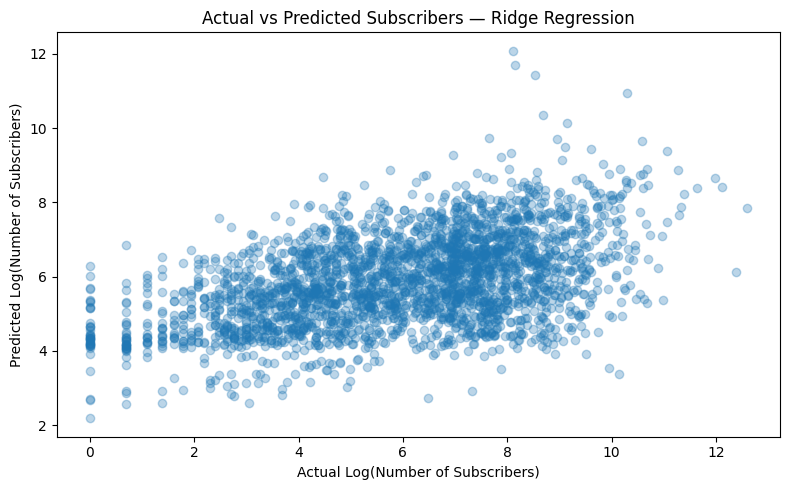

In [ ]:
# Actual vs Predicted (Ridge Regression)

# Predict using the best Ridge model
y_pred_ridge_best = ridge_best.predict(X_test_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_ridge_best, alpha=0.3)
plt.xlabel("Actual Log(Number of Subscribers)")
plt.ylabel("Predicted Log(Number of Subscribers)")
plt.title("Actual vs Predicted Subscribers — Ridge Regression")
plt.tight_layout()
plt.show()



### **Actual vs Predicted (Ridge Regression)**

This scatter plot compares actual versus predicted values of the log-transformed
subscriber count using the Ridge Regression model.

An ideal model would place all points along the 45-degree diagonal. The observed
spread indicates moderate predictive performance, consistent with the R² score.
While Ridge Regression improves coefficient stability, it does not substantially
increase predictive power over the baseline model, suggesting that non-linear
relationships may exist in the data.


In [ ]:
# Ridge Coefficient Interpretation

# Train Ridge model using the best alpha
best_alpha = ridge_results_df.sort_values(
    by="r2_score", ascending=False
).iloc[0]["alpha"]

ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(X_train_scaled, y_train)

# Create coefficient DataFrame
ridge_coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": ridge_best.coef_
}).sort_values(by="Coefficient", ascending=False)

ridge_coefficients


,Feature,Coefficient
2,original_price,0.484747
1,is_discounted,0.466220
8,course_age_days,0.436499
3,num_published_lectures,0.376490
5,creation_to_publish_days,-0.055936
4,num_published_practice_tests,-0.060652
7,published_month,-0.106588
6,published_year,-0.453927
0,is_paid,-0.800443


### **Ridge Coefficient Interpretation**

The coefficients of the best-performing Ridge Regression model were examined
to understand feature impact on the logarithm of subscriber counts.

Due to L2 regularization, coefficient magnitudes are generally smaller and
more stable compared to ordinary linear regression. This results in improved
model robustness while preserving interpretability.


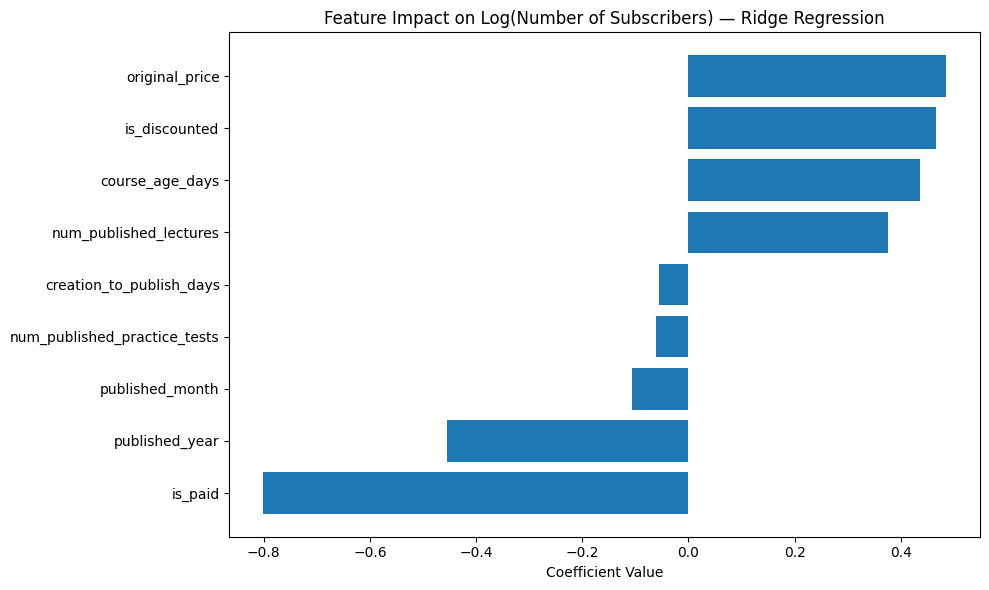

In [ ]:
# Ridge Coefficient Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(ridge_coefficients["Feature"], ridge_coefficients["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Feature Impact on Log(Number of Subscribers) — Ridge Regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### **Ridge Feature Importance Visualization**

A horizontal bar chart was used to visualize feature coefficients from the
Ridge Regression model. This visualization highlights the relative direction
and magnitude of each feature’s impact on subscriber growth.

The plot demonstrates how regularization stabilizes coefficients while still
allowing meaningful interpretation of feature importance.


In [ ]:
# Lasso Regression with Hyperparameter Tuning
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

alpha_values = [0.001, 0.01, 0.1, 1, 10]
lasso_results = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)

    y_pred_lasso = lasso_model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred_lasso)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

    lasso_results.append((alpha, r2, rmse))

lasso_results_df = pd.DataFrame(
    lasso_results,
    columns=["alpha", "r2_score", "rmse"]
)

lasso_results_df.sort_values(by="r2_score", ascending=False)


,alpha,r2_score,rmse
1,0.010,0.230265,2.070178
0,0.001,0.229477,2.071236
2,0.100,0.220296,2.083540
3,1.000,-0.000091,2.359699
4,10.000,-0.000091,2.359699


### **Lasso Regression with Regularization**
Lasso Regression was applied to introduce L1 regularization into the modeling
process. Unlike Ridge Regression, Lasso has the ability to shrink some feature
coefficients exactly to zero, effectively performing automatic feature
selection.

Multiple values of the regularization parameter (alpha) were evaluated to
analyze how increasing regularization strength affects model performance.
Model effectiveness was assessed using R² and RMSE on the test dataset.


In [ ]:
# Best Alpha Selection for Lasso

best_alpha_lasso = lasso_results_df.sort_values(
    by="r2_score", ascending=False
).iloc[0]["alpha"]

# Train final Lasso model
lasso_best = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=10000)
lasso_best.fit(X_train_scaled, y_train)

best_alpha_lasso



np.float64(0.01)

### **Best Lasso Model Selection**

The performance of Lasso Regression models across different alpha values was
compared to identify the optimal regularization strength. The model achieving
the highest R² score with an acceptable RMSE was selected for further analysis.

This step helps determine the most effective balance between model simplicity
and predictive performance.


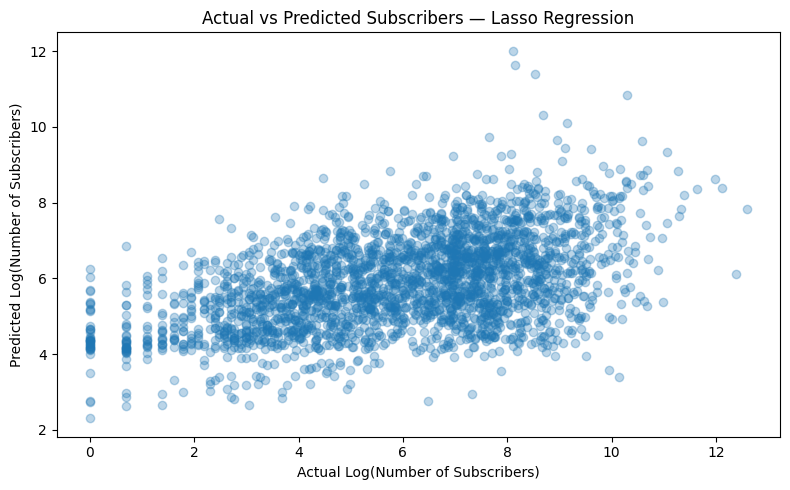

In [ ]:
# Actual vs Predicted Plot (Lasso)

# Predict using best Lasso model
y_pred_lasso_best = lasso_best.predict(X_test_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lasso_best, alpha=0.3)
plt.xlabel("Actual Log(Number of Subscribers)")
plt.ylabel("Predicted Log(Number of Subscribers)")
plt.title("Actual vs Predicted Subscribers — Lasso Regression")
plt.tight_layout()
plt.show()





### **Lasso Actual vs Predicted**
This scatter plot compares actual versus predicted values of the log-transformed
subscriber count using the Lasso Regression model. The dispersion of points
around the diagonal indicates the model’s predictive accuracy.

Compared to Ridge Regression, Lasso emphasizes simplicity by focusing only on
the most influential features, which may result in slightly different prediction
patterns.


In [ ]:
# Lasso Coefficient Interpretation (Feature Selection)

# Train Lasso model using the best alpha
best_alpha_lasso = lasso_results_df.sort_values(
    by="r2_score", ascending=False
).iloc[0]["alpha"]

lasso_best = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=10000)
lasso_best.fit(X_train_scaled, y_train)

# Create coefficient DataFrame
lasso_coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lasso_best.coef_
}).sort_values(by="Coefficient", ascending=False)

lasso_coefficients


,Feature,Coefficient
8,course_age_days,0.878055
2,original_price,0.478580
1,is_discounted,0.454816
3,num_published_lectures,0.371765
6,published_year,-0.000000
7,published_month,-0.033033
5,creation_to_publish_days,-0.045990
4,num_published_practice_tests,-0.052167
0,is_paid,-0.789372


### **Lasso Coefficient Interpretation**

The coefficients produced by the best-performing Lasso Regression model were
examined to understand feature importance. Due to L1 regularization, some
coefficients may be reduced to exactly zero, indicating that those features do
not contribute meaningfully to the prediction of subscriber counts.

This behavior allows Lasso Regression to act as a built-in feature selection
method, highlighting the most influential predictors.


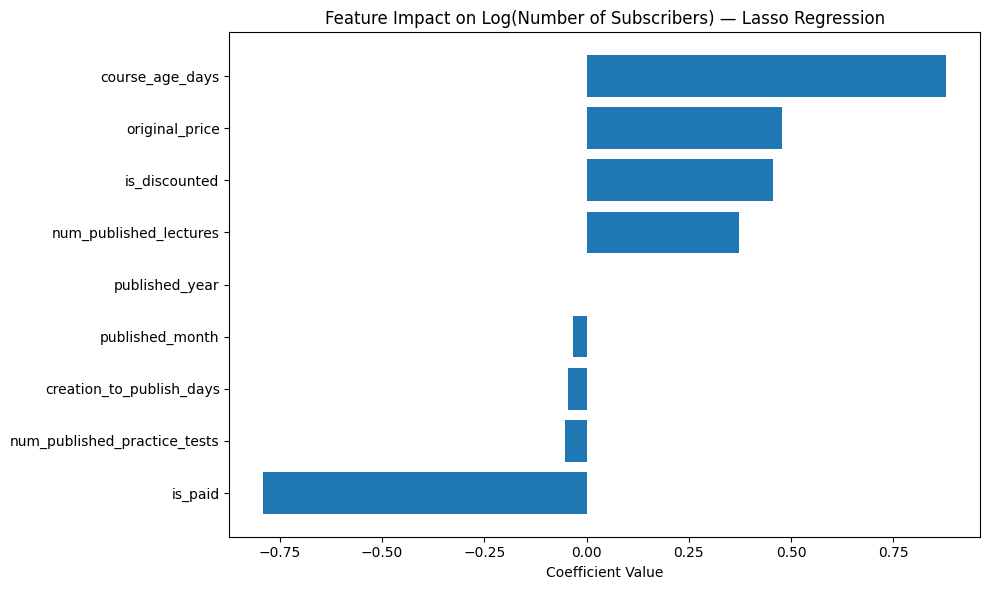

In [ ]:
# Lasso Coefficient Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(lasso_coefficients["Feature"], lasso_coefficients["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Feature Impact on Log(Number of Subscribers) — Lasso Regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### **Lasso Feature Importance Visualization**

A horizontal bar chart was used to visualize the coefficients generated by the
Lasso Regression model. Features with zero or near-zero coefficients represent
variables that were effectively removed by the model.

This visualization clearly demonstrates the sparsity-inducing nature of Lasso
Regression and helps identify the most critical drivers of subscriber growth.


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

### **Random Forest Regression**

Linear models (Linear, Ridge, Lasso) assume a linear relationship between features and the target variable. However, subscriber growth on platforms like Udemy is highly non-linear and influenced by complex interactions (e.g., discounts + course age + content size).

Random Forest Regression is an ensemble, tree-based model that:
- Captures non-linear relationships
- Automatically models feature interactions
- Is robust to outliers
- Typically performs better on real-world tabular data

In this step, we train a Random Forest model to improve predictive performance beyond linear baselines.


In [ ]:
# Predicting on Data and calculating performance

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_r2, rf_rmse


(0.2582891678723168, np.float64(2.0321428745417927))

The trained Random Forest model is evaluated on the test set using R² and RMSE.
This allows direct comparison with Linear, Ridge, and Lasso models.


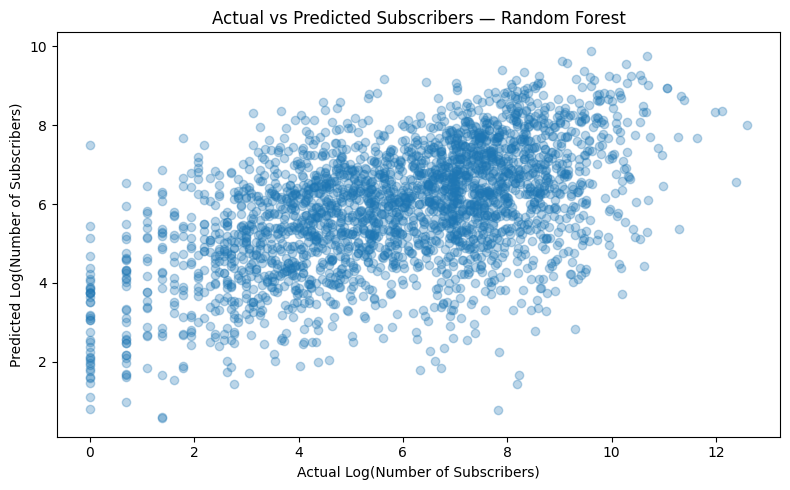

In [ ]:
# Actual vs Predicted Subscribers

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Log(Number of Subscribers)")
plt.ylabel("Predicted Log(Number of Subscribers)")
plt.title("Actual vs Predicted Subscribers — Random Forest")
plt.tight_layout()
plt.show()


### **Actual vs Predicted Subscribers - Random Forest**
This scatter plot compares actual subscriber counts with model predictions.

A tighter clustering around the diagonal indicates improved predictive accuracy.

Random Forest typically reduces underprediction of high-subscriber courses compared to linear models.


In [ ]:
# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
8,course_age_days,0.379348
3,num_published_lectures,0.205985
5,creation_to_publish_days,0.173272
2,original_price,0.126577
7,published_month,0.058471
1,is_discounted,0.022532
0,is_paid,0.019130
4,num_published_practice_tests,0.008769
6,published_year,0.005917


### **Feature Importance**
Random Forest provides feature importance scores based on how much each feature reduces prediction error across trees.

Higher importance values indicate stronger influence on subscriber prediction.


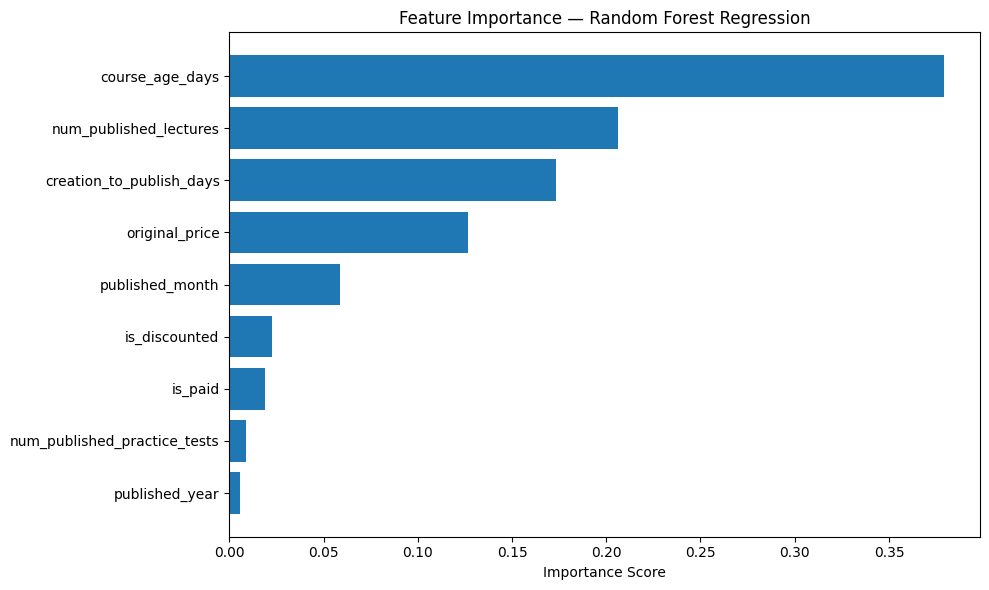

In [ ]:
# Visualisation of Feature Importance

plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance Score")
plt.title("Feature Importance — Random Forest Regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### **Feature Importance Visualization**
This visualization highlights the most influential features driving subscriber growth.

Unlike linear coefficients, Random Forest importance reflects non-linear and interaction effects.


In [ ]:
# Model Performance Comparison

import pandas as pd

# Create a comparison table for all trained models
model_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Random Forest Regression"
    ],
    "R2 Score": [
        r2,                 # Linear Regression
        ridge_results_df.iloc[0]["r2_score"],  # Best Ridge
        lasso_results_df.iloc[0]["r2_score"],  # Best Lasso
        rf_r2               # Random Forest
    ],
    "RMSE": [
        rmse,               # Linear Regression
        ridge_results_df.iloc[0]["rmse"],
        lasso_results_df.iloc[0]["rmse"],
        rf_rmse
    ]
})

# Sort models by R² score (descending)
model_comparison = model_comparison.sort_values(
    by="R2 Score",
    ascending=False
)

model_comparison


,Model,R2 Score,RMSE
3,Random Forest Regression,0.258289,2.032143
2,Lasso Regression,0.229477,2.071236
1,Ridge Regression,0.228812,2.072130
0,Linear Regression,-0.000091,2.359699


### **Model Comparison & Selection**
This section compares the performance of all trained models using two key evaluation metrics:

1. R² Score (Coefficient of Determination)
   - Measures how much variance in the target variable is explained by the model.
   - Higher values indicate better explanatory power.

2. RMSE (Root Mean Squared Error)
   - Measures the average prediction error in log-subscriber space.
   - Lower values indicate better predictive accuracy.

Models Compared:
- Linear Regression (baseline)
- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization + feature selection)
- Random Forest Regression (non-linear ensemble model)

Key Observations:
- Linear, Ridge, and Lasso regression models show similar performance, with R² values around ~0.23.
- Regularization (Ridge/Lasso) slightly stabilizes coefficients but does not significantly improve predictive power.
- Random Forest Regression achieves the highest R² score (~0.26) and the lowest RMSE, indicating superior performance.

Conclusion:
Random Forest Regression is selected as the final model because it:
- Captures non-linear relationships between course features and subscriber growth
- Outperforms linear models on both R² and RMSE
- Provides interpretable feature importance scores for business insights

This model best balances predictive performance and interpretability for real-world decision-making.


### **Understanding and Predicting Udemy Course Subscriber Growth Using Course Metadata**
-----------------------------------
### **Project Summary**

This project analyzes and predicts Udemy course popularity using historical course metadata, pricing information, and temporal features available prior to or at the time of course publication. The primary objective was to identify the key drivers of subscriber growth while avoiding post-enrollment data leakage.

The target variable was the log-transformed number of subscribers, a transformation applied to stabilize variance and reduce the influence of extreme values, enabling more robust and interpretable modeling.

-----------------------------------
### **Key Insights from Exploratory Data Analysis**


1. Course Age Is the Strongest Driver of Subscribers
   - Older courses consistently accumulate more subscribers over time.
   - This trend is clearly visible across EDA plots and confirmed by all models.
   - Course longevity plays a crucial role in long-term subscriber growth.

2. Content Volume Matters
   - Courses with a higher number of published lectures tend to attract more subscribers.
   - This suggests learners perceive higher lecture counts as greater value.

3. Pricing Strategy Influences Reach
   - Discounted courses show higher average subscriber counts.
   - Udemy’s heavy-discount model appears effective in driving enrollment volume.
   - Original price alone has limited impact without discounting.

4. Paid vs Free Courses
   - Free courses attract higher subscriber counts on average.
   - However, paid courses may still perform better in revenue-based analysis (outside the scope of this project).

-----------------------------------
### **Model Performance Summary**


Four models were trained and evaluated:
- Linear Regression (Baseline)
- Ridge Regression
- Lasso Regression
- Random Forest Regression

Observations:
- Linear, Ridge, and Lasso models achieved similar performance (R² ≈ 0.23).
- Regularization improved coefficient stability but did not significantly improve predictive accuracy.
- Random Forest Regression achieved the highest performance:
  - Best R² score
  - Lowest RMSE
  - Ability to capture non-linear relationships

**Final Model Selected:**  

*✔ Random Forest Regression*


-----------------------------------
### **Feature Importance (Random Forest)**


Top influential features:
1. Course Age (Days)
2. Number of Published Lectures
3. Time Taken to Publish
4. Original Price
5. Discount Status

This confirms that both temporal and structural course features matter more than simple binary flags.

-----------------------------------
### **Business Recommendations**


For Course Creators:
- Focus on producing comprehensive courses with more lectures.
- Maintain courses over time and update content to retain relevance.
- Leverage Udemy discount cycles strategically to boost visibility.

For Platform Strategy:
- Promote older high-quality courses during major sales.
- Highlight lecture count and course depth in recommendations.
- Use discount-based targeting to increase subscriber acquisition.

-----------------------------------
### **Limitations**


- Revenue and completion rates were not included.
- Instructor reputation and course topic granularity were unavailable.
- Subscriber growth dynamics over time were not modeled.

-----------------------------------
### **Future Improvements**


- Include revenue, completion rate, and review sentiment.
- Use time-series modeling for subscriber growth.
- Apply advanced ensemble techniques (XGBoost, LightGBM).
- Perform hyperparameter tuning using GridSearchCV.

-----------------------------------
### **Conclusion**


This project demonstrates that subscriber growth on Udemy is driven primarily by course longevity, content depth, and pricing strategy rather than binary paid/free status alone. Random Forest Regression proved to be the most effective model for capturing these relationships and provides actionable insights for both instructors and platform decision-makers.
